## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Model preprocessing
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import RobustScaler

import plotly.offline as pyo
import plotly.graph_objs as go

import itertools
from itertools import combinations
from math import comb

from os import name

from scipy.stats import uniform, randint
import xgboost as xgb

# Model metrics and analysis
from sklearn.metrics import  mean_squared_error, mean_absolute_error

# plot tree model
import graphviz

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pintoanabel/homelessness/main/clean_homelessness%20(1).csv')

##### $\rightarrow$ Review the contents of the data set.

## State your questions

The overall problem is to determine whether and how housing market factors are related to homelessness. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

In [3]:
df.columns

Index(['year', 'coc_number', 'total_homeless', 'total_sheltered',
       'total_unsheltered', 'total_population', 'house_price_index_2009',
       'log_median_rent', 'utility_costs',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'share_renters_2016',
       'rental_vacancy_rate', 'high_housing_density', 'number_eviction',
       'share_overcrowded_units_2016', 'city_or_urban', 'suburban', 'rural',
       'rate_unemployment', 'gini_coefficient_2016', 'poverty_rate',
       'share_HUD_units', 'HUD_unit_occupancy_rate', 'share_built_before_1940',
       'total_black', 'total_latino_hispanic', 'total_asian',
       'total_pacific_islander', 'total_population_0_19',
       'total_population_65_plus', 'total_female_population', 'net_migration',
       'migration_4_year_change', 'proportion_one_person_households',
       'share_under_18_with_single_parent', 'share_veteran_status',
       'share_no_bachelors', 'medicare_reimbursements_per_enr

In [4]:
removed_var = ['total_sheltered', 'total_unsheltered', 'total_black', 'total_latino_hispanic', 'total_asian', 'total_pacific_islander', 'total_population_0_19', 'total_population_65_plus', 'total_female_population', 'year', 'rate_unsheltered', 'rate_sheltered']

In [5]:
df = df.drop(columns = removed_var)

In [ ]:
# Create 'area_density' column based on dummy variables
df['area_density'] = None
df.loc[df['city_or_urban'] == 1, 'area_density'] = 'city_or_urban'
df.loc[df['suburban'] == 1, 'area_density'] = 'suburban'
df.loc[df['rural'] == 1, 'area_density'] = 'rural'

# Convert 'area_density' to categorical data type
df['area_density'] = df['area_density'].astype('category')

In [6]:
X = df[df.columns.difference(['coc_number', 'total_homeless', 'rate_homeless', 'area_density', 'total_population'])]
Y = df['rate_homeless']

In [7]:
X.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,migration_4_year_change,...,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
0,99.000000,13.800000,60.799999,1,42.010002,0,11.743647,2.438863,8.751520,-0.849202,...,0.366995,65.634148,4.117406,39.727921,23.379078,14.535126,0,1.710000,16.500000,8.500000
1,99.000000,13.800000,60.799999,0,40.675701,0,9.042710,2.249699,9.972870,-0.466562,...,2.236410,75.560379,9.294898,33.922234,19.786558,14.142518,0,1.710000,16.500000,14.607715
2,95.083710,50.995346,80.874313,0,47.633533,0,-0.852477,1.862248,9.318163,-0.000659,...,7.191579,65.983711,1.235925,31.769621,32.077599,9.149558,1,6.669876,38.593376,19.492331
3,87.000801,57.893360,81.939949,1,46.713249,0,-8.507004,1.858394,8.709522,0.208839,...,3.681716,74.543457,1.712736,32.109203,33.668129,11.647923,0,12.296666,58.519012,18.899839
4,95.178665,48.382103,79.429985,0,45.165546,0,0.751167,1.362010,8.967195,0.231822,...,5.150007,82.332657,1.539988,27.708206,27.959316,9.135015,0,5.462999,44.778618,18.803186


# Train Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .15, random_state = 24)

Create correlation matrix heatmap, removing `coc_number`

<Axes: >

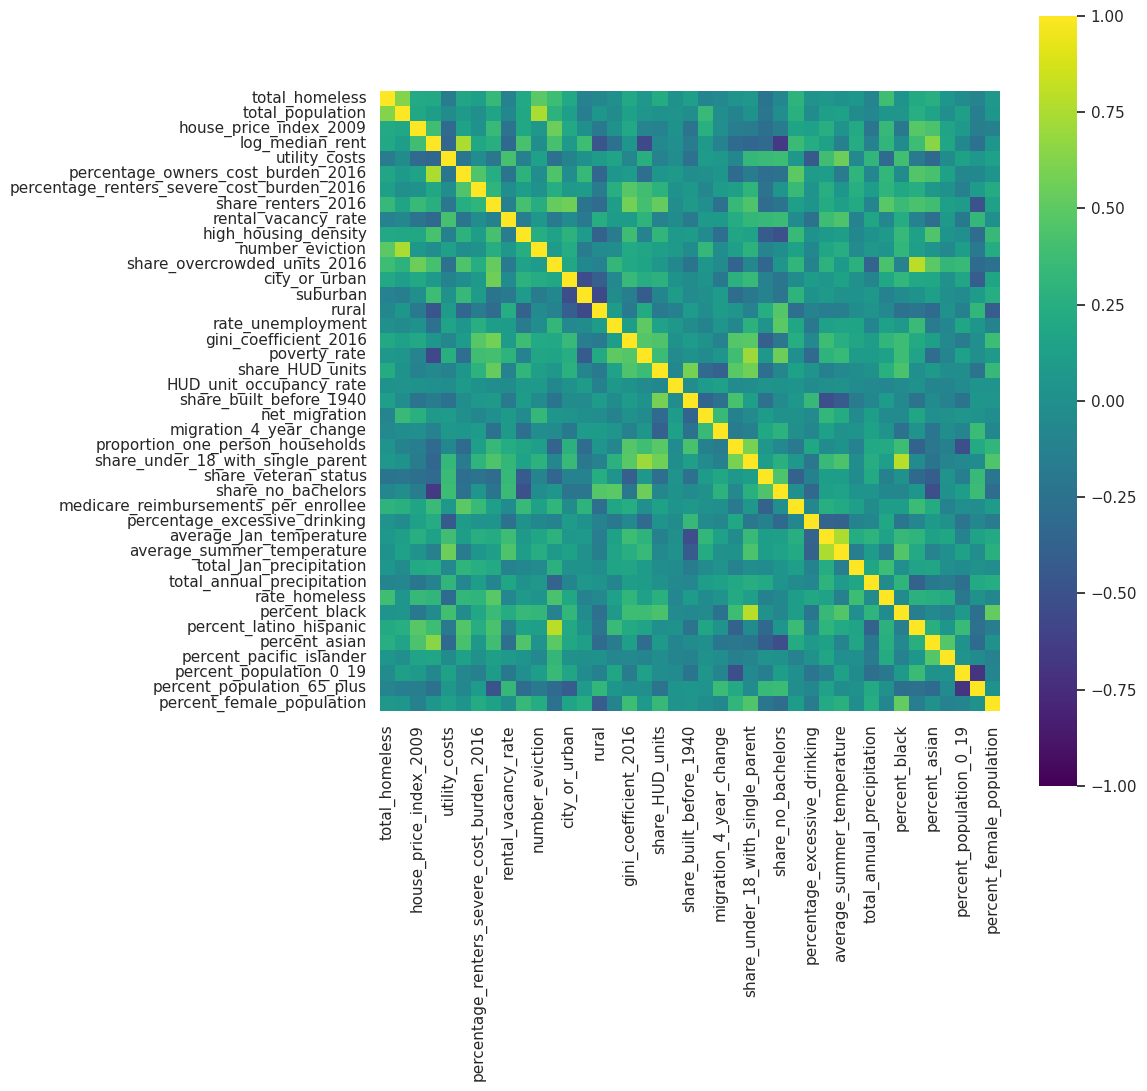

In [10]:
corr_matrix = df.drop(columns = ['coc_number']).corr()

plt.figure(figsize = (10,10))

sns.heatmap(corr_matrix, vmax = 1, vmin = -1, square = True, cmap = 'viridis')

#Fit Models on Full Dataset

scale the dataframe for the predictors

In [11]:
scaler = RobustScaler().fit(X)

In [12]:
X = pd.DataFrame(data = scaler.transform(X), columns  = X.columns.values, index = X.index)

Fit the model on the full dataset

In [13]:
model = sm.OLS(Y, sm.add_constant(X)).fit()

In [14]:
X.shape

(374, 38)

In [15]:
y_prediction = model.predict(sm.add_constant(X))

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     12.44
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.18e-43
Time:                        00:15:11   Log-Likelihood:                -1394.3
No. Observations:                 374   AIC:                             2865.
Df Residuals:                     336   BIC:                             3014.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

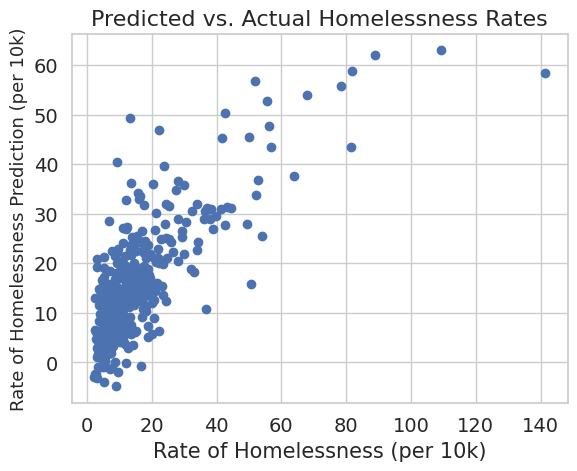

In [17]:
plt.plot(df['rate_homeless'], y_prediction, 'o')

# Add axis labels
plt.xlabel('Rate of Homelessness (per 10k)', fontsize=15)
plt.ylabel('Rate of Homelessness Prediction (per 10k)', fontsize=13)
plt.title('Predicted vs. Actual Homelessness Rates', fontsize = 16)

# Increase the fontsize of the tick labels 
plt.tick_params(labelsize=14);

Too many variables in the model

In [18]:
y_pred_lr = model.predict(sm.add_constant(X))

In [19]:
MSE = mean_squared_error(Y, y_pred_lr)
RMSE = np.sqrt(MSE)
R_squared = r2_score(Y, y_pred_lr)

print('MSE = ', MSE.round(3), 'RMSE = ', RMSE.round(3), 'R-squared = ', R_squared.round(3))

MSE =  101.345 RMSE =  10.067 R-squared =  0.578


In [20]:
mean_absolute_error(Y, y_pred_lr)

6.730766949751333

Fit Model on Training Dataset

In [21]:
scaler = RobustScaler().fit(x_train)

In [22]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

#Lasso Regression

In [23]:
alphas = 10**np.linspace(-4,0,10)

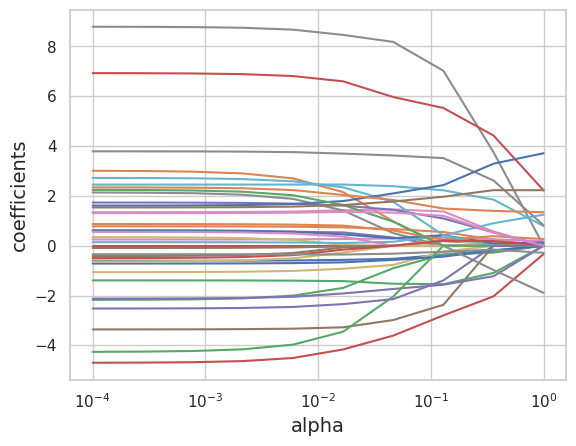

In [24]:
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

In [25]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)

In [26]:
lassocv.fit(x_train, y_train)
lassocv.alpha_

0.8715344521488156

the alpha value is 0.87

plot the lasso regression

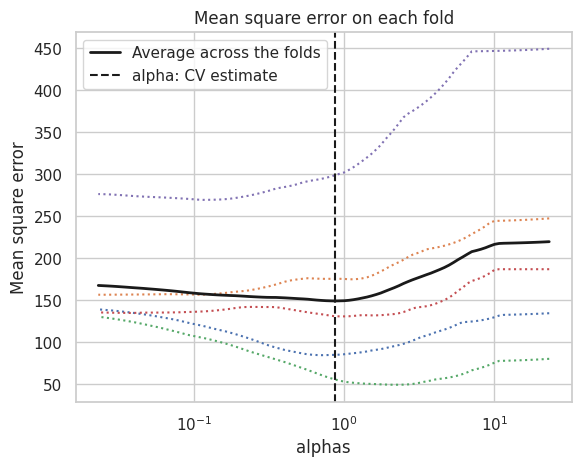

In [27]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

This plot displays the MSE with various alpha values in a lasso regression

In [28]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(x_train, y_train)

In [29]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,12.40
HUD_unit_occupancy_rate,-0.00
average_Jan_temperature,-0.00
average_summer_temperature,-0.00
city_or_urban,0.00
gini_coefficient_2016,0.00
high_housing_density,-0.00
house_price_index_2009,0.00
log_median_rent,0.00
medicare_reimbursements_per_enrollee,-0.00


 Positive and negative signs show whether the relationship between each variable and homelessness is positive or negative, meaning whether the relationship caused an increase or decrease in homelessness.

In [30]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(x_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(x_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 164.997  RMSE = 12.845  R-squared = 0.528


Lower MSE indicates that the model performs better, and in the same way RMSE indicates better performance. In this model, the predicted value is 12.85 units off of the actual. the R-Squared being 0.52, meaning that 52.8% of the variance is explained by predictor variables.

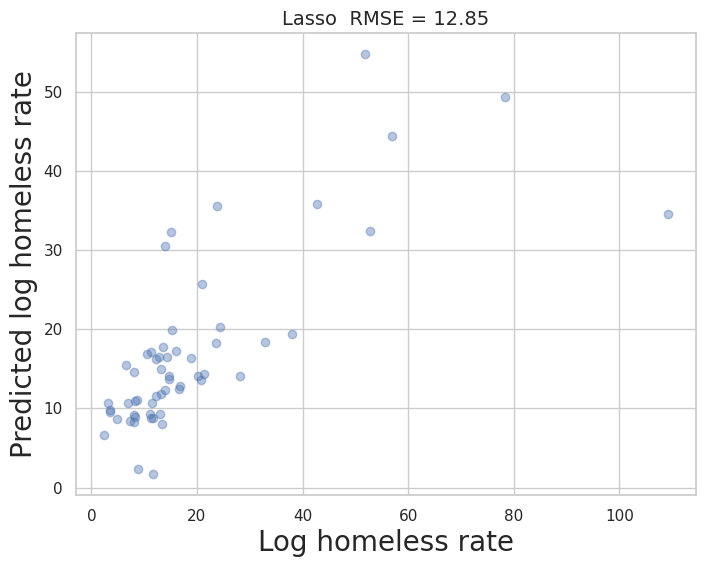

In [31]:
plt.figure(figsize=(8,6))

plt.plot(y_test, lasso_reg.predict(x_test),'o', alpha = 0.4)

plt.xlabel('Log homeless rate',fontsize = 20)
plt.ylabel('Predicted log homeless rate',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14);

## Ridge

Construct a ridge regression to reduce multicollinearity, and keep all variables

set up the alpha values

In [32]:
alphas = 10**np.linspace(-3,5,20)

plot the regression

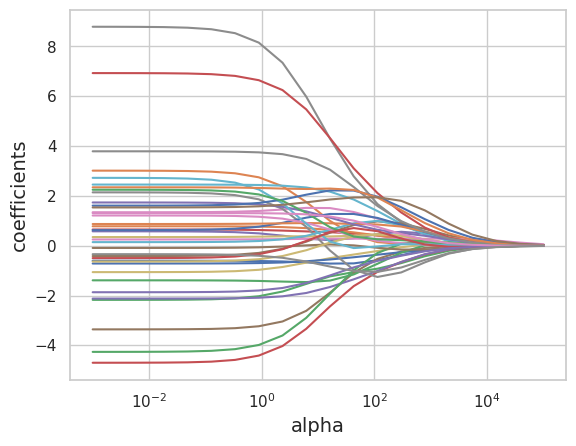

In [33]:
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

In [34]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')

ridgecv.fit(x_train, y_train);

best alpha value determined through cross-validation

In [35]:
ridgecv.alpha_

112.88378916846884

The alpha value is 112.88

alpha applied to ridge model

In [36]:
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(x_train, y_train)

In [37]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,12.256
HUD_unit_occupancy_rate,-0.580
average_Jan_temperature,0.144
average_summer_temperature,-0.921
city_or_urban,0.410
gini_coefficient_2016,0.465
high_housing_density,-0.528
house_price_index_2009,1.094
log_median_rent,1.675
medicare_reimbursements_per_enrollee,-0.211


coefficients indicate the relationship between predictors and homelessness rates in the Ridge.

In [38]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(x_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(x_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 160.66  RMSE = 12.675  R-squared = 0.54


# XGBoost Method

Set up XGB model

In [39]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7eaa705690>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7eaa707130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7eaa705ab0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7eaa705c90>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

we use negative mean squared error because this function maximizes the input, and we don't want a large mean squared error, so we use the opposite.

In [40]:
search.best_params_

{'colsample_bytree': 0.7652668295745699,
 'gamma': 0.2975974635214919,
 'learning_rate': 0.10453068095144118,
 'max_depth': 3,
 'n_estimators': 145,
 'subsample': 0.9406514681700572}

In [41]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

set up the xgb parameters

In [42]:
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7652668295745699, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2975974635214919, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.10453068095144118, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=145, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Fit the model on the training data

In [45]:
model_xgb = xgb.XGBRegressor()  
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predict the test data

In [46]:
y_pred_xgb = model_xgb.predict(X_test)

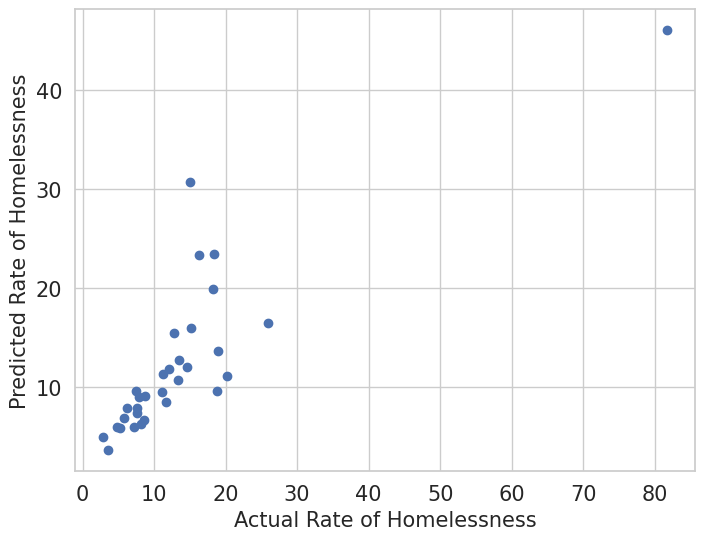

In [47]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Actual Rate of Homelessness', fontsize = 15)
plt.ylabel('Predicted Rate of Homelessness', fontsize = 15)

plt.tick_params(labelsize = 15)

This plot displays predicted homeless rates vs actual

Compute the RMSE

In [48]:
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)

7.789

Computing the mean absolute error

In [49]:
mean_absolute_error(y_test, y_pred_xgb).round(3)

4.006

Plot the variable importances for the XGB model

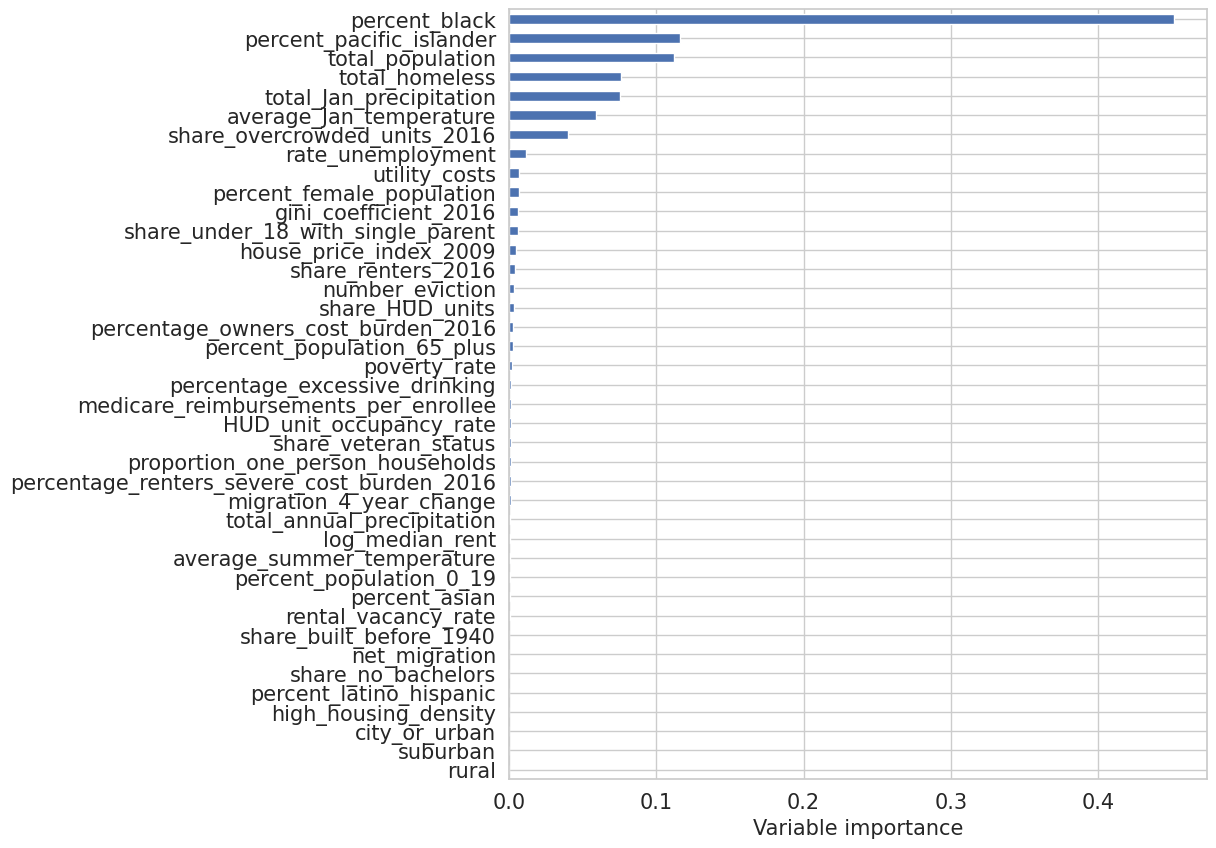

In [50]:
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (9,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);

Plot the tree model

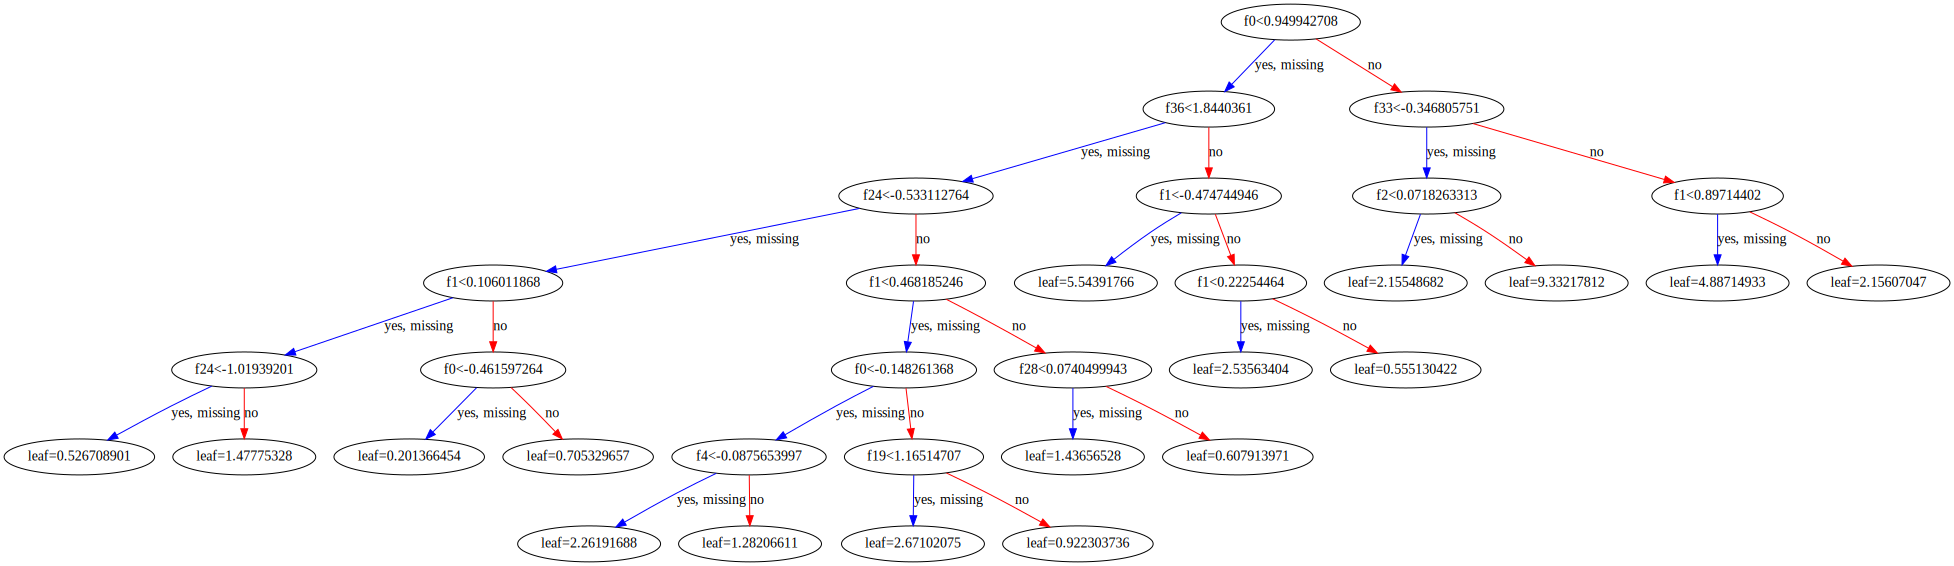

In [52]:
xgb.to_graphviz(model_xgb, num_trees=1)

# Additional Step

The additional step looks at the population density of different areas (city/urban, suburban, and rural) and the potential impact on homelessness rates.

A lasso regression was used with RMSE

## City or Urban Area

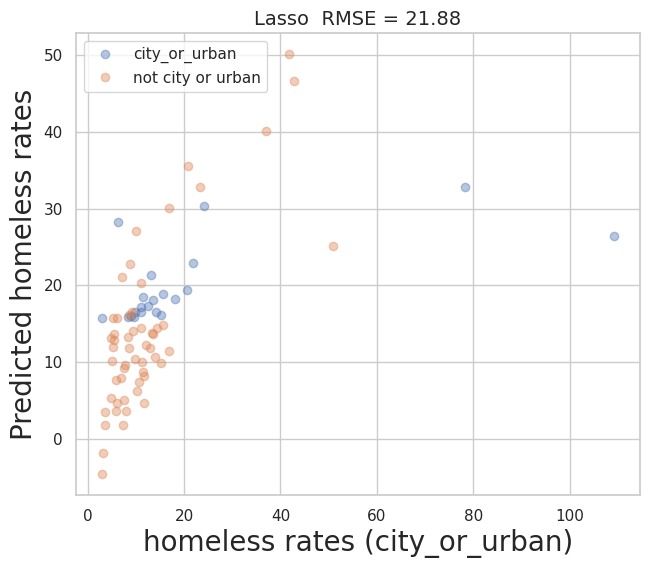

In [57]:

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['city_or_urban'] == 1]
y = df['rate_homeless'].loc[df['city_or_urban'] == 1]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')


MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Initialize and fit Lasso Regression method 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Compute MSE, RMSE, and R^2
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plot Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "city_or_urban")
plt.xlabel('homeless rates (city_or_urban)',fontsize = 20)
plt.ylabel('Predicted homeless rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)


X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['city_or_urban'] == 0]
y = df['rate_homeless'].loc[df['city_or_urban'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))


plt.subplot(1,2,1) 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "not city or urban")

plt.subplots_adjust(hspace = 0.5)

plt.legend(loc="upper left") 
plt.show()

## Suburban

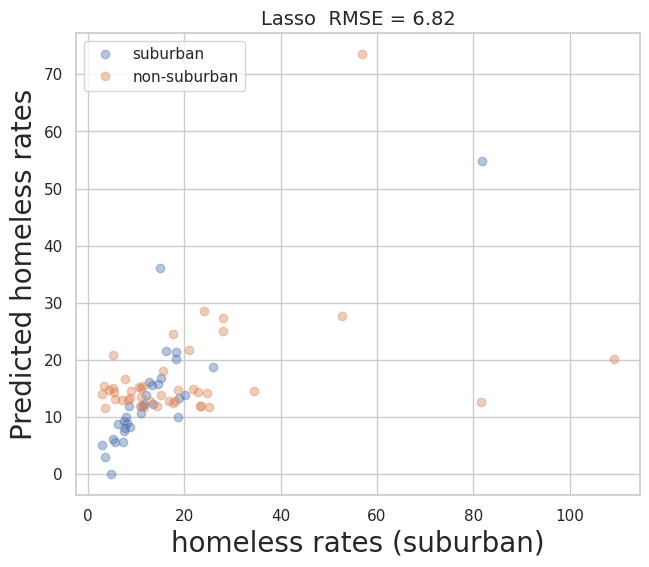

In [56]:

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 1]
y = df['rate_homeless'].loc[df['suburban'] == 1]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')


MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Initialize and fit Lasso Regression method 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Compute MSE, RMSE, and R^2
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plot Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "suburban")
plt.xlabel('homeless rates (suburban)',fontsize = 20)
plt.ylabel('Predicted homeless rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)


X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['suburban'] == 0]
y = df['rate_homeless'].loc[df['suburban'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))


plt.subplot(1,2,1) 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "non-suburban")

plt.subplots_adjust(hspace = 0.5)

plt.legend(loc="upper left") 
plt.show()

## Rural

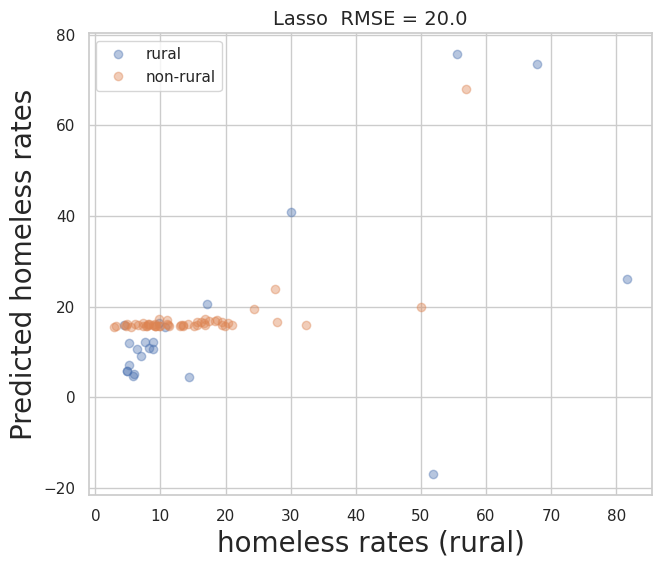

In [55]:

X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['rural'] == 1]
y = df['rate_homeless'].loc[df['rural'] == 1]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')


MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Initialize and fit Lasso Regression method 
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

# Compute MSE, RMSE, and R^2
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

plt.figure(figsize=(16,6))

# Plot Lasso predictions 
plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "rural")
plt.xlabel('homeless rates (rural)',fontsize = 20)
plt.ylabel('Predicted homeless rates',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)


X = df.drop(columns = ['coc_number', 'rate_homeless']).loc[df['rural'] == 0]
y = df['rate_homeless'].loc[df['rural'] == 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 8647)
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))
alphas = 10**np.linspace(-4,2,10)
lasso = Lasso(max_iter = 100000)
coefs = []


lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
lassocv.fit(X_train, y_train)
lassocv.alpha_
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))


plt.subplot(1,2,1) 
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4, label = "non-rural")

plt.subplots_adjust(hspace = 0.5)

plt.legend(loc="upper left") 
plt.show()

## Conclusion

Low RMSE values indicatethat a model is predicting values that are closer to the actual values. The Lasso model for the suburban predictor, of the 3 levels of area density (city/urban, suburban, rural), had the lowest RMSE of 6.82. Rural yielded an RMSE of 20.0 and city/urba yielded 21.88.
For future research, I'd want to include Ridge regression models, however, I ran into errors generating those this time around.